In [1]:
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

import pandas as pd

In [2]:
df=pd.read_csv("../datas/BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-06,9072.849609,9375.474609,9058.664063,9375.474609,9375.474609,17889263252
1,2020-07-07,9349.161133,9360.617188,9201.815430,9252.277344,9252.277344,13839652595
2,2020-07-08,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,19702359883
3,2020-07-09,9427.994141,9431.378906,9234.999023,9277.967773,9277.967773,18000702524
4,2020-07-10,9273.357422,9287.471680,9118.001953,9278.807617,9278.807617,16860035605


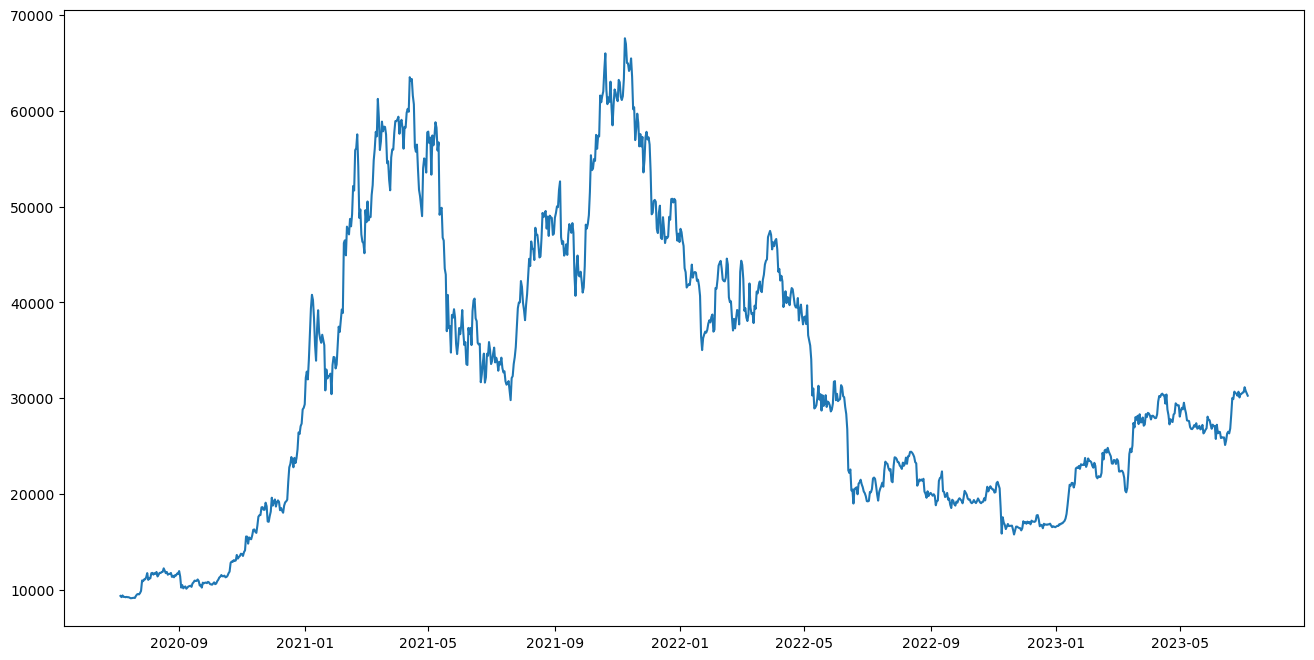

In [3]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [5]:
final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

In [6]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(x_train_data, y_train_data)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
predicted_closing_price=model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price.reshape(-1, 1))


In [8]:
import pickle

In [9]:
model_filename = "../models/xgboost_model.pkl"
with open(model_filename, "wb") as model_file:
    pickle.dump(model, model_file)
print(f"Model saved to {model_filename}")

Model saved to ../models/xgboost_model.pkl


C:\Users\Admin\AppData\Local\Temp\ipykernel_6460\107833647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


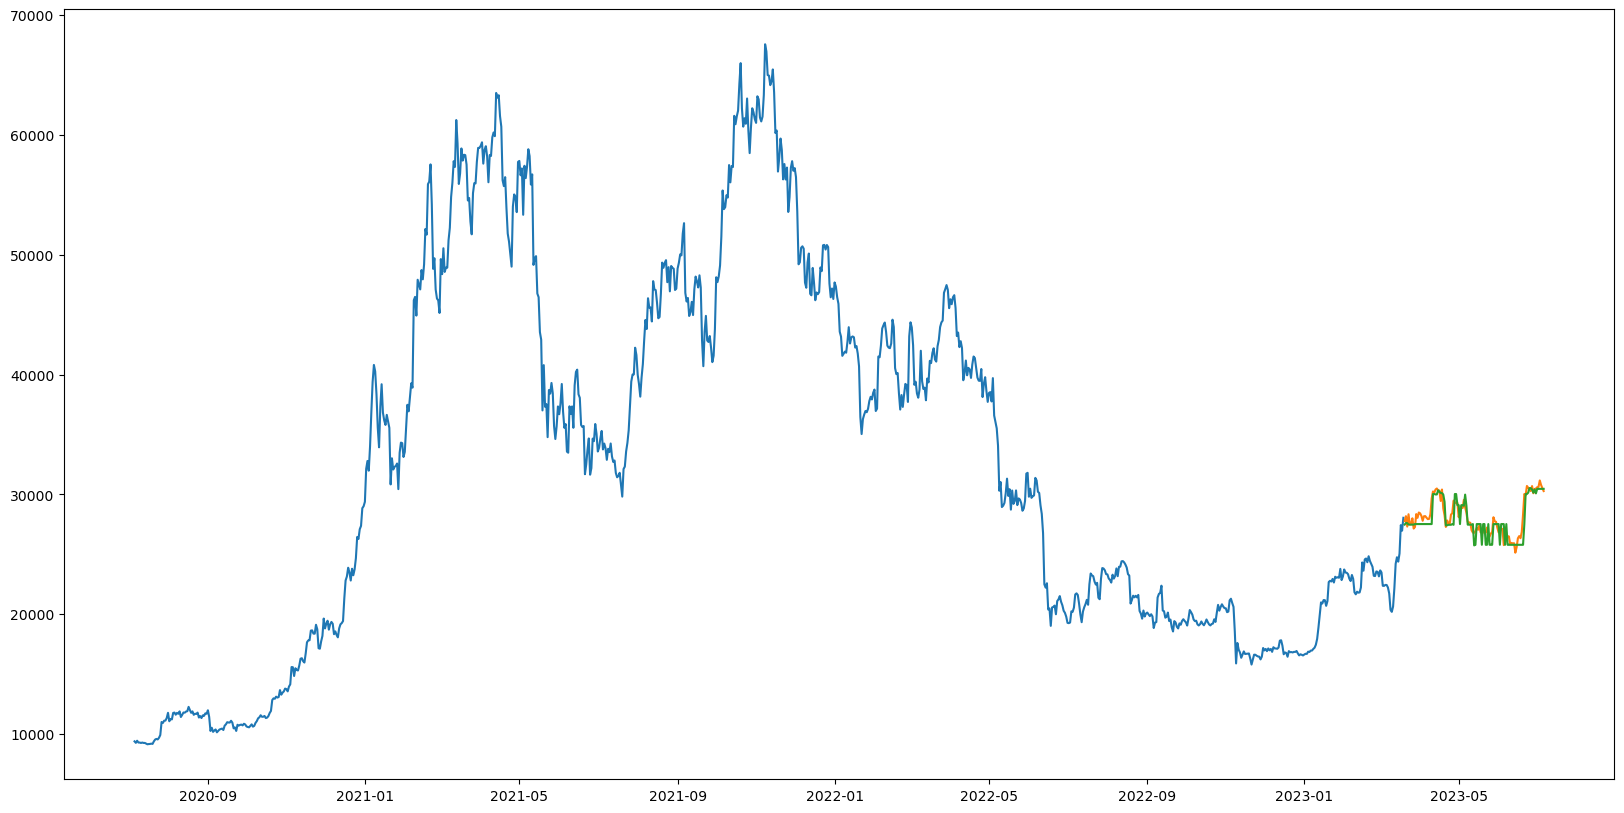

In [10]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [11]:
import import_ipynb
import predictor

In [14]:
predict = predictor.XGBoostPredictor('../models/xgboost_model.pkl')
predict.predict(X_test)

array([0.3138152 , 0.31612298, 0.3159592 , 0.31381738, 0.31381738,
       0.31381738, 0.31381738, 0.31381738, 0.31458405, 0.31458405,
       0.31458405, 0.31458405, 0.31458405, 0.31458405, 0.31458405,
       0.31458405, 0.31458405, 0.31458405, 0.31458405, 0.31458405,
       0.31458405, 0.31458405, 0.35749435, 0.35749435, 0.35689148,
       0.35689148, 0.36280388, 0.3608528 , 0.35892493, 0.35892493,
       0.3567277 , 0.3462965 , 0.3127799 , 0.3127799 , 0.31354657,
       0.31354657, 0.31354657, 0.31458405, 0.31354657, 0.35749435,
       0.35749435, 0.34161878, 0.34161878, 0.31458405, 0.34161878,
       0.34161878, 0.3407834 , 0.35665897, 0.3407834 , 0.31374866,
       0.31374866, 0.31374866, 0.31374866, 0.31458405, 0.28413087,
       0.28496626, 0.31458405, 0.31458405, 0.31458405, 0.31458405,
       0.28496626, 0.31458405, 0.31458405, 0.28496626, 0.28496626,
       0.31458405, 0.28496626, 0.28496626, 0.28496626, 0.31458405,
       0.31458405, 0.31458405, 0.31458405, 0.31458405, 0.28496